In [3]:
import pandas as pd
import os
from pathlib import Path
from hackutilitiy import *
import matplotlib.pyplot as plt

## Report on quantitative data

In [4]:
# Read all .csv files to dataframes. For larger files read a chunk for a sneak peek.
data_dct = csv_to_dataframe(nrows=100_000) 

# Read the factor descriptions provided in the instructions manual to dataframe
factor_glossary = pd.read_csv('./table1/table1.csv')

In [3]:
# Display the names of the available data frames
data_dct.keys()

dict_keys(['factor_char_list', 'mkt_ind', 'ret_sample', 'acc_ratios', 'na_name_merge', 'global_name_merge', 'us_cik_gvkey_linktable'])

In [4]:
# Display data file info, including size, variables types, number of missing values
reports = csv_reports()


=== factor_char_list.csv ===
Size: 1.61 KB (1647 bytes)
Shape: (147, 1)
Dtypes (first-chunk inference):
  - variable: object
Missing (top 10 columns by count):
  - variable: 0 (0.0%)

=== mkt_ind.csv ===
Size: 6.77 KB (6932 bytes)
Shape: (246, 4)
Dtypes (first-chunk inference):
  - rf: float64
  - year: int64
  - month: int64
  - ret: float64
Missing (top 10 columns by count):
  - rf: 0 (0.0%)
  - year: 0 (0.0%)
  - month: 0 (0.0%)
  - ret: 0 (0.0%)

=== ret_sample.csv ===
Size: 9.17 GB (9849828424 bytes)
Shape: (6401414, 159)
Dtypes (first-chunk inference):
  - id: object
  - date: int64
  - ret_eom: int64
  - gvkey: float64
  - iid: object
  - excntry: object
  - stock_ret: float64
  - year: int64
  - month: int64
  - char_date: int64
Missing (top 10 columns by count):
  - rd5_at: 4511236 (70.47%)
  - seas_2_5na: 4008397 (62.62%)
  - eqpo_me: 3910282 (61.08%)
  - rd_sale: 3816017 (59.61%)
  - rd_me: 3759710 (58.73%)
  - eqnpo_me: 3358475 (52.46%)
  - saleq_su: 3075599 (48.05%)
  - e

In [6]:
factor_features = data_dct['factor_char_list']['variable'].tolist()
non_factor_features = [c for c in (set(data_dct['ret_sample'].columns) - set(factor_features))]

In [7]:
#inspect the factors data
data_dct['ret_sample'].loc[:, factor_features].describe()

,age,aliq_at,aliq_mat,ami_126d,at_be,at_gr1,at_me,at_turnover,be_gr1a,be_me,...,taccruals_at,taccruals_ni,tangibility,tax_gr1a,turnover_126d,turnover_var_126d,z_score,zero_trades_126d,zero_trades_21d,zero_trades_252d
count,100000.000000,73147.000000,68598.000000,86980.000000,84963.000000,84007.000000,86946.000000,84521.000000,80793.000000,84934.000000,...,74073.000000,7.388500e+04,73049.000000,82457.000000,91793.000000,91788.000000,72231.000000,91827.000000,87001.000000,89764.000000
mean,223.955860,1.707405,0.535184,38.037329,4.104769,1.301377,3.278080,0.950972,0.048850,0.940811,...,-0.082042,-5.115689e+01,0.675779,0.003697,0.006022,1.402567,5.204939,0.522454,0.539066,0.562688
std,106.828238,78.964839,0.728326,3240.566648,24.708614,92.871038,72.772158,0.862136,0.462982,22.429695,...,3.273271,7.499061e+03,0.226941,0.053791,0.021313,0.923996,64.580172,2.294672,2.418683,2.378070
min,1.000000,0.000000,0.000000,0.000010,0.000000,-1.000000,0.000000,0.000000,-39.972709,0.000040,...,-324.300000,-1.176104e+06,0.000000,-5.332086,0.000000,0.000000,-9095.674096,0.000010,0.000007,0.000011
25%,158.000000,0.584175,0.323203,0.011017,1.450535,0.008239,0.677708,0.344819,0.007147,0.343503,...,-0.102824,-2.476988e+00,0.560348,-0.001210,0.001104,0.839357,1.598274,0.002369,0.002287,0.002380
50%,254.000000,0.692776,0.493065,0.092572,2.034640,0.101009,1.318972,0.806915,0.040679,0.585176,...,-0.026502,-7.193170e-01,0.675478,0.001326,0.002535,1.158117,2.685017,0.004588,0.004451,0.004603
75%,256.000000,0.829466,0.675734,0.932358,3.191036,0.246685,2.571966,1.307626,0.098294,0.951304,...,0.031838,2.942690e-01,0.792993,0.008890,0.005505,1.651773,4.462962,0.007283,0.006907,0.007428
max,952.000000,17944.321671,80.799406,610483.702790,3561.798883,22862.681409,19347.817221,24.286027,0.982014,6311.994237,...,63.172273,2.235627e+04,7.415096,2.523357,1.632001,11.224972,5462.503597,21.009948,21.009906,21.009955


In [7]:
# Inspect non-factor features
data_dct['ret_sample'].loc[:, non_factor_features] #Standard identifiers for alignment: gvkey or cusip (with year-month for time control

,year,stock_ret,char_date,date,char_eom,iid,id,month,ret_eom,me,gvkey,excntry
0,2005,-0.143457,20050131,20050228,20050131,01C,comp_001081_01C,2,20050228,2398.152284,1081.0,CAN
1,2005,0.028077,20050131,20050228,20050131,01C,comp_001096_01C,2,20050228,301.116426,1096.0,CAN
2,2005,-0.168627,20050131,20050228,20050131,02,comp_001117_02,2,20050228,32.808300,1117.0,USA
3,2005,0.086271,20050131,20050228,20050131,01W,comp_001166_01W,2,20050228,911.419063,1166.0,NLD
4,2005,0.149056,20050131,20050228,20050131,01C,comp_001186_01C,2,20050228,1099.753789,1186.0,CAN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2005,-0.126694,20050531,20050630,20050531,01W,comp_228628_01W,6,20050630,6.686833,228628.0,DEU
99996,2005,0.081677,20050531,20050630,20050531,01W,comp_228629_01W,6,20050630,60.372374,228629.0,DEU
99997,2005,0.074949,20050531,20050630,20050531,01W,comp_228630_01W,6,20050630,372.338080,228630.0,DEU
99998,2005,0.028179,20050531,20050630,20050531,01W,comp_228636_01W,6,20050630,123.359209,228636.0,JPN


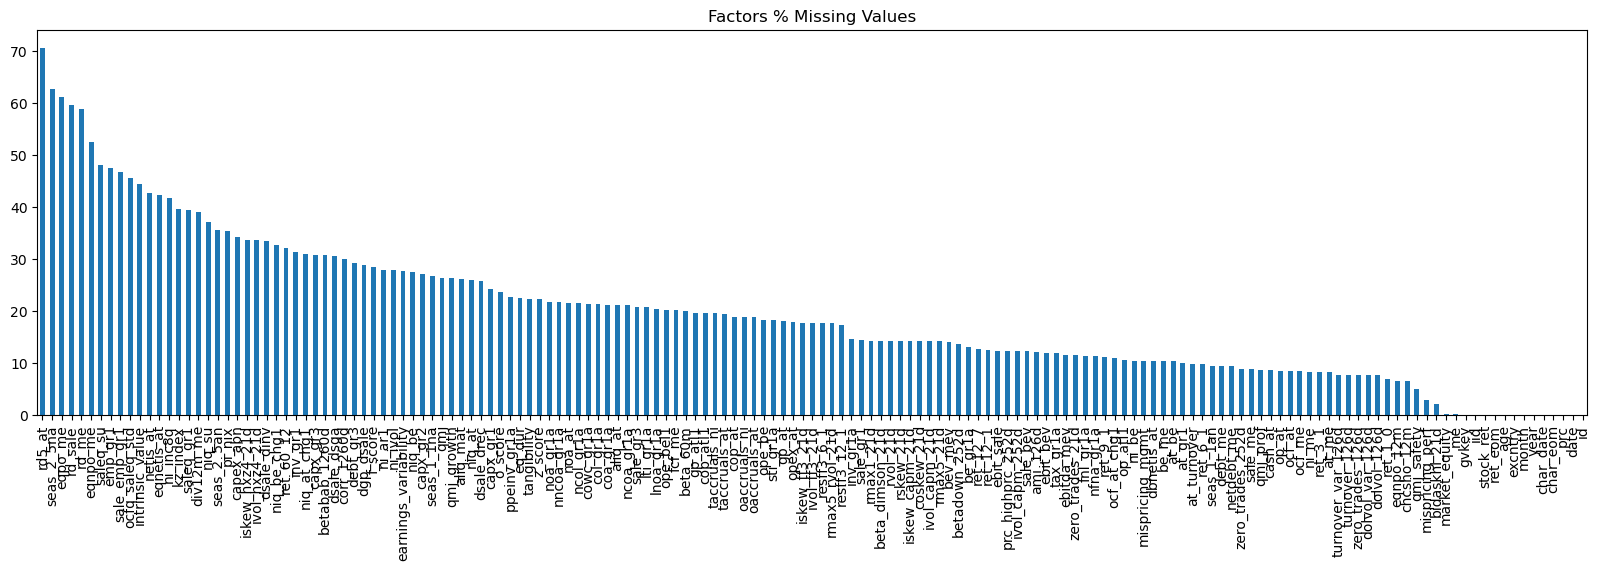

In [9]:
factors_isna_pct = pd.Series(reports['ret_sample.csv']['missing']['percent']).sort_values(ascending=False)
factors_isna_pct.plot(kind='bar', figsize=(20,5), rot=90, title='Factors % Missing Values')
plt.savefig('missing_vals.png')
plt.show()

In [11]:
# Distinguish referenced and non referenced factors
factors_no_ref = list(set(factor_features)-set(factor_glossary["Acronym"].values))
factors_with_ref = list(set(factor_features).intersection(set(factor_glossary["Acronym"].values)))

# List refrenced factors
idx_factor_features = factor_glossary.index[factor_glossary["Acronym"].isin(factors_with_ref)].tolist()
factor_glossary['Feature'].iloc[idx_factor_features].reset_index().drop('index', axis=1).rename(columns={'Feature':'Referenced Factors'})

,Referenced Factors
0,Firm age
1,Liquidity of book assets
2,Liquidity of market assets
3,Amihud Measure
4,Book leverage
...,...
73,Share turnover
74,Coefficient of variation for share turnover
75,Altman Z-score
76,Number of zero trades with turnover as tiebrea...


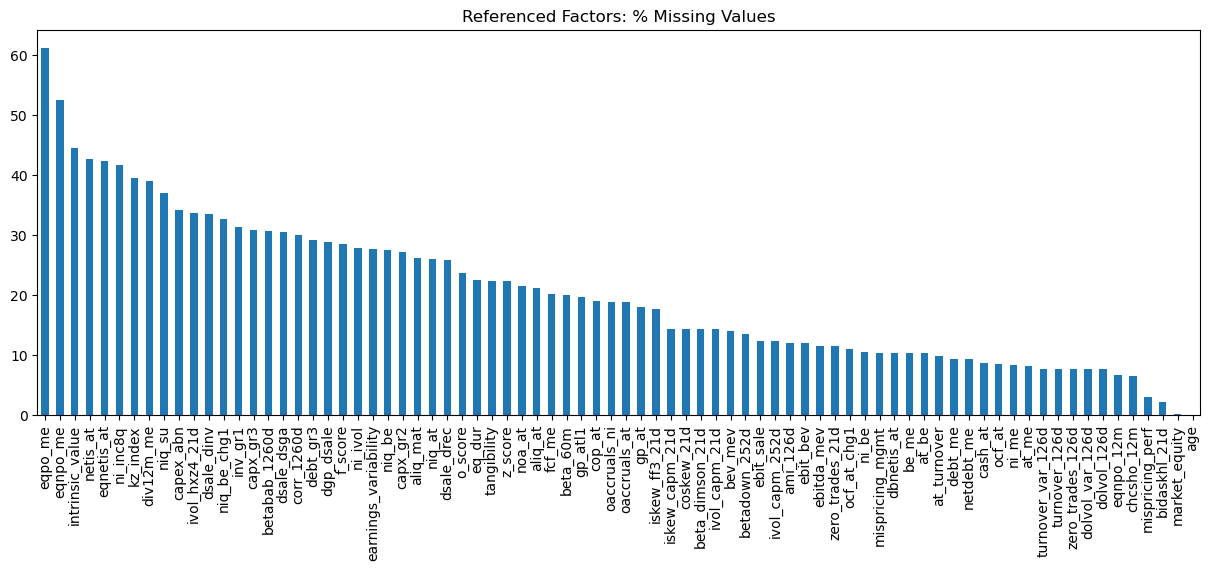

In [11]:
# Inspect referenced factors by missing values
factors_isna_pct[factors_with_ref].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=90, title="Referenced Factors: % Missing Values")
plt.show()

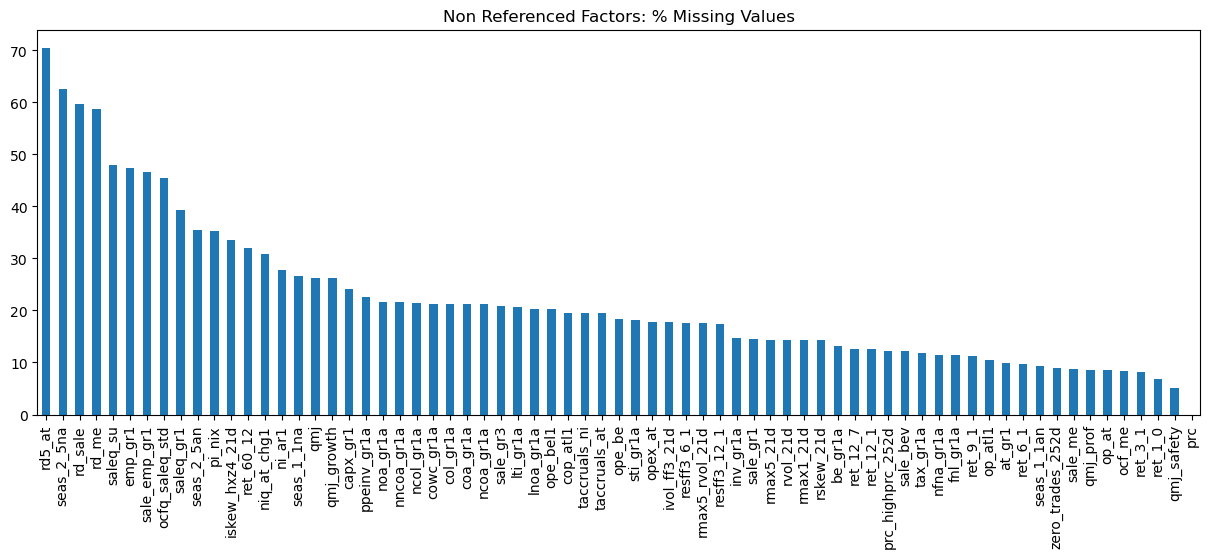

In [12]:
# Inspect non-referenced factors by missing values
factors_isna_pct[factors_no_ref].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=90, title="Non Referenced Factors: % Missing Values")
plt.show()

### Predicting accounting ratios (e.g., EBIT-to-Sales, operating margins, ROA) can reveal firms likely to deliver positive surprises. Since fundamentals are less volatile than returns, they are often easier to predict reliably.


In [12]:
# Accounting ratios in acc_ratio.csv that can serve as targets.
acc_ratios = data_dct['acc_ratios']['Variable'].tolist()

In [ ]:
# Unreferenced accounting factors
unreferenced_accounting_factors = set(acc_ratios).intersection(set(factors_no_ref))

{'op_at', 'rd_me', 'rd_sale', 'sale_me'}

In [8]:
data_dct['ret_sample'].loc[:, non_factor_features].columns

Index(['year', 'stock_ret', 'char_date', 'date', 'char_eom', 'iid', 'id',
       'month', 'ret_eom', 'me', 'gvkey', 'excntry'],
      dtype='object')

# Glossary of identifiers in the linktables

🔹 **cik**

Meaning: **Central Index Key**.

Issued by the SEC’s EDGAR system to **uniquely identify companies and individuals who file disclosure documents with the SEC**.

Example: Apple’s CIK = 0000320193.

**Used to link Compustat firms (gvkey) with SEC filings (10-K, 10-Q)**.

🔹 **tpci**

Meaning: **Trading Public Company Indicator (Compustat variable)**.

A flag indicating the trading status of the security or company.

Values (from WRDS / Compustat docs):

"0" = Not a public company / not trading (to be checked, looks to the contrary)

"1" = Publicly traded company (to be checked, looks to the contrary)

Sometimes extended values exist depending on dataset vintage.

🔹 In your us_cik_gvkey_linktable context

**gvkey** → **Compustat’s unique firm identifier**.

**cik** → **SEC’s identifier** (so you can join to EDGAR filings).

**tpci** → **Indicator whether the gvkey is linked to a publicly traded company** (helps filter out private or non-trading entities when consolidating).

✅ So practically:

Use cik when you want to pull SEC filings for the firm.

Use tpci to filter down to actively traded companies (exclude stale or private).




🔹 **cusip**

Meaning: **Committee on Uniform Securities Identification Procedures number**.

It’s a **9-character alphanumeric identifier assigned to U.S. and Canadian securities** (stocks and bonds).

Structure:

First 6 = issuer code.

Next 2 = issue identifier.

Last 1 = check digit.

In Compustat: lets you **link to market data** (CRSP, Bloomberg, etc.) **at the security leve**.

Example: Apple Inc. common stock = 037833100.

🔹 **iid**

Meaning: **Issue Identifier (Compustat)**.

**Distinguishes different securities (issues) for the same firm (gvkey)**.

Example: A company might have common stock, preferred stock, bonds — all share the same gvkey but different iid.

Together, **(gvkey, iid) pinpoints a unique security within a firm**.

🔹 **fic**

Meaning: **Foreign Incorporation Code**.

Indicates the **country of incorporation of the firm**.

It’s a 3-character ISO country code (e.g., USA, CAN, GBR).

Useful **when consolidating across global datasets or filtering U.S. vs foreign companies**.

✅ In summary, in this context:

cusip → security identifier, links to markets.

iid → security issue within the firm.

fic → firm’s country of incorporation.


## Glossary of columns from ret_sample

 --------------------------------------------------------------------------
  Column        Description
  ------------- ------------------------------------------------------------
  `me`          **Market Equity** -- the firm's market capitalization (price
                × shares outstanding), typically reported in millions of
                USD. Used as a size characteristic.


  `id`          **Unique Security Identifier** -- composite identifier
                (e.g., `comp_001081_01C`) combining dataset prefix, firm
                key, and issue ID. Used to track securities across time.

  `char_eom`    **Characteristic End-of-Month Date** -- the end-of-month
                date (YYYYMMDD) when firm characteristics were measured.
                Typically lagged relative to returns.

  `iid`         **Issue Identifier** -- Compustat issue ID distinguishing
                multiple securities of the same firm (e.g., `01C` = common
                stock issue C).




In [ ]:
import duckdb

con = duckdb.connect()

# Query multiple parquet files in one go
rets_db = con.execute("""
    SELECT gvkey, excntry, me, stock_ret, id, year, iid, month, date, ret_eom
    FROM './MAIN DATA and SUPPORTING CODES/ret_sample.csv'
""").df()

rets_db.to_csv('stock_data.csv')